## Imports

In [2]:
#imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

#preprcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


#evaluation
from sklearn.metrics import accuracy_score #for the logistic regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


## Importing Dataset

In [3]:
dataset = pd.read_csv('train.csv')
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Some statistics about attribute

In [5]:
#describing the dataset
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## Checking for null values in dataset

In [6]:
count = dataset.isnull().sum()
print(count)

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


No Null values

## Histogram distribution for attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CDA5E2248>,
      dtype=object)

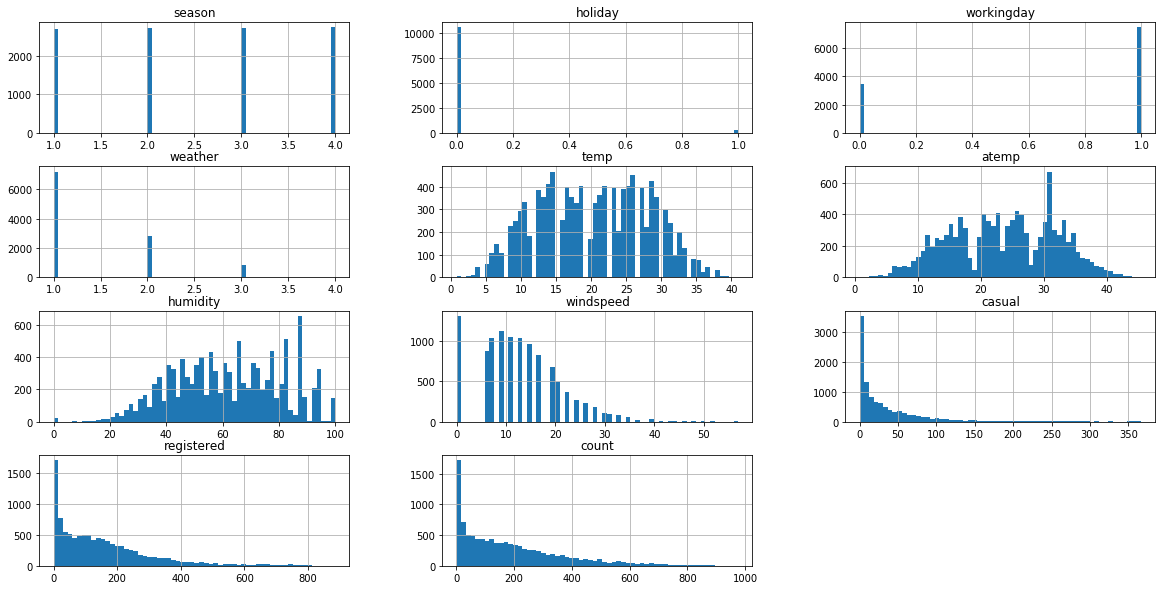

In [7]:
dataset.hist(bins=60,figsize=(20,10))

featurs temp, atemp and humidity are gaussian distributions

## Some random rows from the data

In [8]:
dataset.sample(n=10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
4635,2011-11-06 05:00:00,4,0,0,1,9.84,12.120,87,8.9981,0,5,5
10656,2012-12-10 10:00:00,4,0,1,2,18.04,21.970,94,15.0013,12,121,133
5178,2011-12-09 20:00:00,4,0,1,1,12.30,16.665,81,0.0000,10,140,150
3094,2011-07-17 20:00:00,3,0,0,1,31.16,35.605,58,16.9979,85,177,262
7935,2012-06-11 00:00:00,2,0,1,1,28.70,32.575,65,7.0015,8,33,41
10281,2012-11-13 19:00:00,4,0,1,1,13.12,14.395,49,23.9994,12,344,356
4923,2011-11-18 05:00:00,4,0,1,1,9.02,11.365,44,8.9981,0,22,22
391,2011-01-17 19:00:00,1,1,0,3,7.38,9.090,59,12.9980,2,58,60
7612,2012-05-16 13:00:00,2,0,1,1,29.52,32.575,42,0.0000,77,273,350
2380,2011-06-07 02:00:00,2,0,1,1,24.60,29.545,73,6.0032,3,2,5


## Preprocessing

In [9]:
#splitting the datetime column into separate columns
dataset['datetime'] = pd.to_datetime(dataset['datetime'], errors='coerce')

dataset['month'] = dataset['datetime'].dt.month
dataset['day'] = dataset['datetime'].dt.day
dataset['hour'] = dataset['datetime'].dt.hour


In [10]:
dataset.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4


In [11]:
#We will replace season,workingday and weather with appropriate categorical values
#this is done to perform the analysis

In [12]:
dataset['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"}, inplace=True)
dataset.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4
5,2011-01-01 05:00:00,spring,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,1,5
6,2011-01-01 06:00:00,spring,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,1,6
7,2011-01-01 07:00:00,spring,0,0,1,8.20,12.880,86,0.0000,1,2,3,1,1,7
8,2011-01-01 08:00:00,spring,0,0,1,9.84,14.395,75,0.0000,1,7,8,1,1,8
9,2011-01-01 09:00:00,spring,0,0,1,13.12,17.425,76,0.0000,8,6,14,1,1,9


In [13]:
dataset.sample(n=5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
8097,2012-06-17 18:00:00,summer,0,0,1,26.24,31.060,53,12.9980,203,310,513,6,17,18
19,2011-01-01 19:00:00,spring,0,0,3,17.22,21.210,88,16.9979,6,31,37,1,1,19
4099,2011-10-02 20:00:00,winter,0,0,2,14.76,16.665,76,16.9979,16,71,87,10,2,20
7059,2012-04-12 12:00:00,summer,0,1,1,18.86,22.725,41,30.0026,60,199,259,4,12,12
1413,2011-04-04 18:00:00,summer,0,1,2,29.52,31.820,23,32.9975,78,308,386,4,4,18


In [14]:
dataset['weather'].replace({1:"Clear",2:"Misty+cloudy",3:"Light Snow/Rain",4:'Heavy Snow/Rain'},inplace=True)
dataset.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,Clear,9.84,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,0,1,1,1,1,4
5,2011-01-01 05:00:00,spring,0,0,Misty+cloudy,9.84,12.880,75,6.0032,0,1,1,1,1,5
6,2011-01-01 06:00:00,spring,0,0,Clear,9.02,13.635,80,0.0000,2,0,2,1,1,6
7,2011-01-01 07:00:00,spring,0,0,Clear,8.20,12.880,86,0.0000,1,2,3,1,1,7
8,2011-01-01 08:00:00,spring,0,0,Clear,9.84,14.395,75,0.0000,1,7,8,1,1,8
9,2011-01-01 09:00:00,spring,0,0,Clear,13.12,17.425,76,0.0000,8,6,14,1,1,9


In [15]:
dataset.sample(n=5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
3687,2011-09-04 13:00:00,fall,0,0,Misty+cloudy,31.98,37.120,62,19.0012,245,174,419,9,4,13
7090,2012-04-13 19:00:00,summer,0,1,Clear,22.14,25.760,24,11.0014,75,352,427,4,13,19
9872,2012-10-15 17:00:00,winter,0,1,Clear,22.96,26.515,64,16.9979,96,670,766,10,15,17
3351,2011-08-09 13:00:00,fall,0,1,Clear,34.44,39.395,49,11.0014,48,127,175,8,9,13
6207,2012-02-14 21:00:00,spring,0,1,Misty+cloudy,14.76,18.180,50,7.0015,4,105,109,2,14,21


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  month       10886 non-null  int64         
 13  day         10886 non-null  int64         
 14  hour        10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(9), object(2)
memory usage: 1.

## checking for corelations between features using pairplot

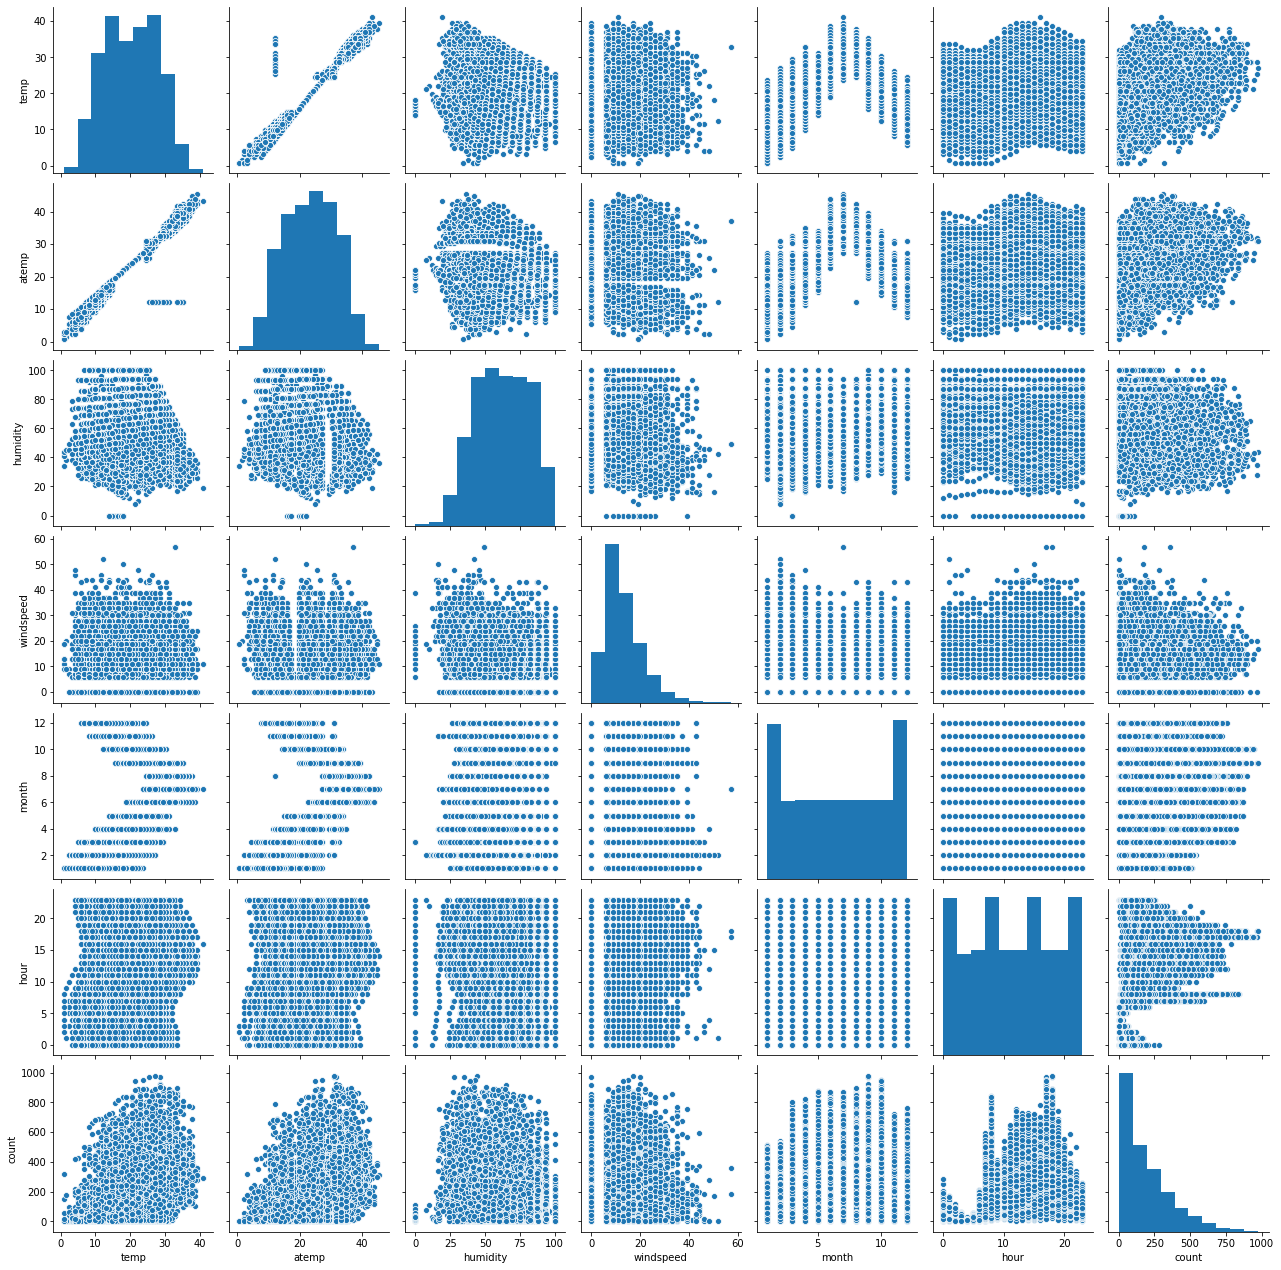

In [17]:
#pairplot to check for any correlation between the variables
sns.pairplot(dataset, vars=['temp','atemp','humidity','windspeed',"month","hour","count"])
plt.show()

In [18]:
#from the pairwise graph we can deduce:
#1.temp and atemp are highly correlated (they have a linear relationship)

## checking for corelations between features using heatmap 

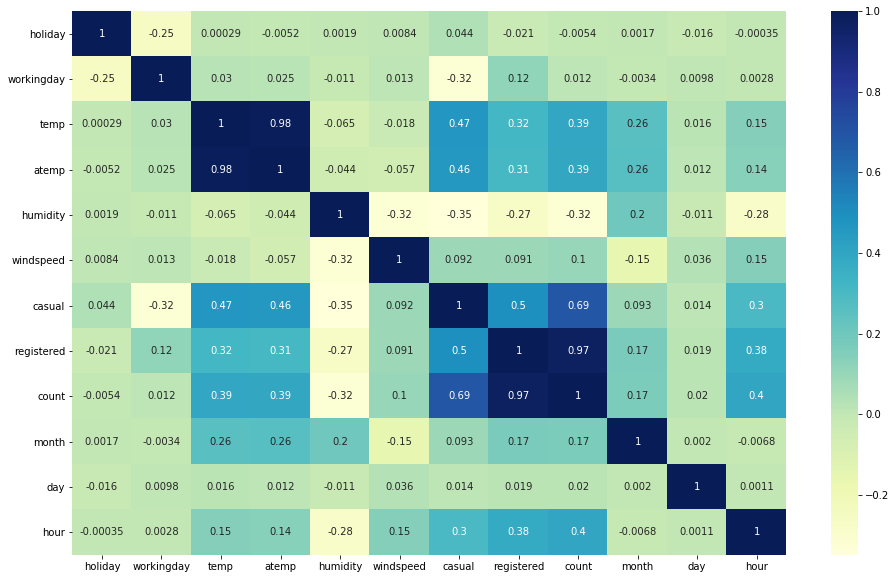

In [19]:
#draw the heat map to check for correlation values
plt.figure(figsize = (16, 10))
sns.heatmap(dataset.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [20]:
#deductions from the heat map:
#the correlation between temp and atemp is 0.98, which is almost 1 (very high)

#so, we need the drop the temp column

dataset.drop(['temp'],axis=1,inplace=True)
dataset.head(10)

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,Clear,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,Clear,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,Clear,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,Clear,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,Clear,14.395,75,0.0000,0,1,1,1,1,4
5,2011-01-01 05:00:00,spring,0,0,Misty+cloudy,12.880,75,6.0032,0,1,1,1,1,5
6,2011-01-01 06:00:00,spring,0,0,Clear,13.635,80,0.0000,2,0,2,1,1,6
7,2011-01-01 07:00:00,spring,0,0,Clear,12.880,86,0.0000,1,2,3,1,1,7
8,2011-01-01 08:00:00,spring,0,0,Clear,14.395,75,0.0000,1,7,8,1,1,8
9,2011-01-01 09:00:00,spring,0,0,Clear,17.425,76,0.0000,8,6,14,1,1,9


## checking for outliers in the dataset

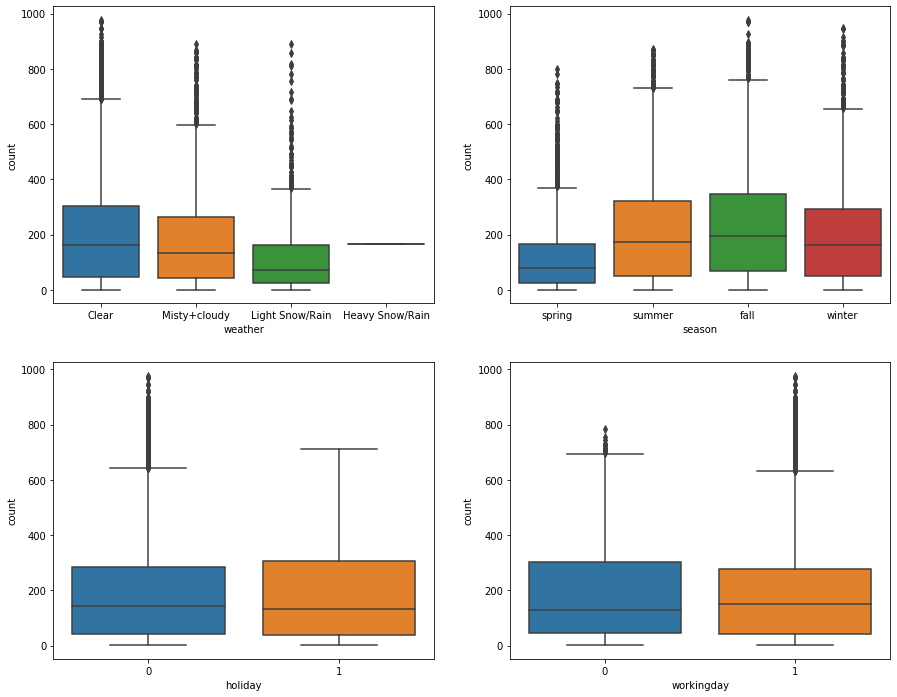

In [21]:
#outliers observations of categorical variables
f, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(data=dataset, y='count', x='weather', ax=axes[0][0])
sns.boxplot(data=dataset, y='count', x='season', ax=axes[0][1])
sns.boxplot(data=dataset, y='count', x='holiday', ax=axes[1][0])
sns.boxplot(data=dataset, y='count', x='workingday', ax=axes[1][1])


## removing outliers using Zscore

In [22]:
#removing the outliers
z_scores = stats.zscore(dataset[['holiday','workingday','atemp','humidity','windspeed','month','day','hour','count']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
dataset = dataset[filtered_entries]

In [23]:
dataset.describe()
#size was: 10886
#after removing outliers: 10342

,holiday,workingday,atemp,humidity,windspeed,casual,registered,count,month,day,hour
count,10342.0,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000
mean,0.0,0.696770,23.580671,62.263682,12.582777,34.919938,148.455715,183.375653,6.526784,9.987720,11.462483
std,0.0,0.459676,8.419908,19.035799,7.843775,49.200220,136.884586,166.844823,3.445433,5.489213,6.939033
min,0.0,0.000000,0.760000,8.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.0,0.000000,16.665000,47.000000,7.001500,4.000000,35.000000,41.000000,4.000000,5.000000,5.000000
50%,0.0,1.000000,24.240000,62.000000,11.001400,16.000000,116.000000,142.000000,6.000000,10.000000,11.000000
75%,0.0,1.000000,31.060000,78.000000,16.997900,47.000000,218.000000,276.000000,10.000000,15.000000,17.000000
max,0.0,1.000000,45.455000,100.000000,36.997400,367.000000,712.000000,734.000000,12.000000,19.000000,23.000000


In [24]:
dataset.head(5)

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,spring,0,0,Clear,14.395,81,0.0,3,13,16,1,1,0
1,2011-01-01 01:00:00,spring,0,0,Clear,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,spring,0,0,Clear,13.635,80,0.0,5,27,32,1,1,2
3,2011-01-01 03:00:00,spring,0,0,Clear,14.395,75,0.0,3,10,13,1,1,3
4,2011-01-01 04:00:00,spring,0,0,Clear,14.395,75,0.0,0,1,1,1,1,4


In [25]:
seasons_dummies = pd.get_dummies(dataset.season)
dataset_v2 = pd.concat([dataset, seasons_dummies], axis='columns')

weather_dummies = pd.get_dummies(dataset.weather)
dataset_v2 = pd.concat([dataset_v2, weather_dummies], axis='columns')

dataset_v2.sample(10)

,datetime,season,holiday,workingday,weather,atemp,humidity,windspeed,casual,registered,...,day,hour,fall,spring,summer,winter,Clear,Heavy Snow/Rain,Light Snow/Rain,Misty+cloudy
407,2011-01-18 23:00:00,spring,0,1,Misty+cloudy,13.635,93,0.0000,1,19,...,18,23,0,1,0,0,0,0,0,1
5518,2012-01-05 01:00:00,spring,0,1,Clear,11.365,51,6.0032,0,5,...,5,1,0,1,0,0,1,0,0,0
479,2011-02-03 01:00:00,spring,0,1,Clear,7.575,44,35.0008,0,5,...,3,1,0,1,0,0,1,0,0,0
7836,2012-06-06 21:00:00,summer,0,1,Clear,25.760,73,11.0014,38,260,...,6,21,0,0,1,0,1,0,0,0
3787,2011-09-08 19:00:00,fall,0,1,Light Snow/Rain,25.760,100,22.0028,1,51,...,8,19,1,0,0,0,0,0,1,0
7102,2012-04-14 07:00:00,summer,0,0,Clear,18.180,71,7.0015,8,56,...,14,7,0,0,1,0,1,0,0,0
4210,2011-10-07 11:00:00,winter,0,1,Clear,26.515,63,0.0000,80,150,...,7,11,0,0,0,1,1,0,0,0
7321,2012-05-04 10:00:00,summer,0,1,Misty+cloudy,29.545,73,8.9981,45,154,...,4,10,0,0,1,0,0,0,0,1
3004,2011-07-14 02:00:00,fall,0,1,Clear,31.060,57,19.9995,3,7,...,14,2,1,0,0,0,1,0,0,0
7610,2012-05-16 11:00:00,summer,0,1,Clear,32.575,54,8.9981,55,212,...,16,11,0,0,1,0,1,0,0,0


## drop unnecessary columns

In [26]:
#drop unnecessary columns
dataset_v2.drop(['datetime','season','weather','casual','registered'],axis=1,inplace=True)

In [27]:
dataset_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10342 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   holiday          10342 non-null  int64  
 1   workingday       10342 non-null  int64  
 2   atemp            10342 non-null  float64
 3   humidity         10342 non-null  int64  
 4   windspeed        10342 non-null  float64
 5   count            10342 non-null  int64  
 6   month            10342 non-null  int64  
 7   day              10342 non-null  int64  
 8   hour             10342 non-null  int64  
 9   fall             10342 non-null  uint8  
 10  spring           10342 non-null  uint8  
 11  summer           10342 non-null  uint8  
 12  winter           10342 non-null  uint8  
 13  Clear            10342 non-null  uint8  
 14  Heavy Snow/Rain  10342 non-null  uint8  
 15  Light Snow/Rain  10342 non-null  uint8  
 16  Misty+cloudy     10342 non-null  uint8  
dtypes: float64(2

In [28]:
#rearrange the columns in the dataset
dataset_v2 = dataset_v2[['month','day','hour','holiday','workingday','atemp','humidity','windspeed','spring','summer','fall','winter','Clear','Misty+cloudy','Light Snow/Rain','Heavy Snow/Rain','count']]

In [29]:
dataset_v2.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
0,1,1,0,0,0,14.395,81,0.0,1,0,0,0,1,0,0,0,16
1,1,1,1,0,0,13.635,80,0.0,1,0,0,0,1,0,0,0,40


## Part 2 (fitting different models)

In [30]:
#splitting the data into train and test data
dataset_train, dataset_test = train_test_split(dataset_v2, train_size = 0.8, test_size = 0.2, random_state = 1)

In [31]:
print(dataset_train.shape)
dataset_train.head(2)

(8273, 17)


,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
1562,4,10,23,0,0,22.725,88,23.9994,0,1,0,0,1,0,0,0,32
9477,9,18,6,0,1,28.790,89,22.0028,0,0,1,0,0,1,0,0,167


In [32]:
#to be used for final evaluation of the model
print(dataset_test.shape)
dataset_test.head(2)

(2069, 17)


,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
6609,3,12,16,0,1,31.06,35,30.0026,1,0,0,0,1,0,0,0,332
5607,1,8,18,0,0,15.91,46,15.0013,1,0,0,0,1,0,0,0,181


## Normalizing the dataset of the train and test separately

In [33]:
#Performing the normalization step, as it's exteremly importantd for the model to perform well
scaler=MinMaxScaler()
dataset_train[['atemp','humidity','windspeed','count']] = scaler.fit_transform(dataset_train[['atemp','humidity','windspeed','count']])
dataset_train.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
1562,4,10,23,0,0,0.508685,0.869565,0.648678,0,1,0,0,1,0,0,0,0.042292
9477,9,18,6,0,1,0.649143,0.880435,0.594712,0,0,1,0,0,1,0,0,0.226467


In [34]:
dataset_test[['atemp','humidity','windspeed','count']] = scaler.fit_transform(dataset_test[['atemp','humidity','windspeed','count']])
dataset_test.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain,count
6609,3,12,16,0,1,0.677928,0.261364,0.810938,1,0,0,0,1,0,0,0,0.453425
5607,1,8,18,0,0,0.338964,0.386364,0.405469,1,0,0,0,1,0,0,0,0.246575


In [35]:
#splitting the train data into train and validation data
dataset_train_v2, dataset_validation = train_test_split(dataset_train, train_size = 0.8, test_size = 0.2, random_state = 1)

In [36]:
#preparing the features and the target
X_train = dataset_train_v2.drop(['count'],axis=1)
y_train = dataset_train_v2['count']

X_train.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain
7760,6,3,17,0,0,0.719314,0.282609,0.459435,0,1,0,0,1,0,0,0
9808,10,13,1,0,0,0.368342,0.489130,0.243209,0,0,0,1,1,0,0,0


In [37]:
X_validate = dataset_validation.drop(['count'],axis=1)
y_validate = dataset_validation['count']

X_validate.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain
8846,8,10,23,0,1,0.771885,0.673913,0.513582,0,0,1,0,1,0,0,0
428,1,19,21,0,1,0.315771,0.445652,0.756791,1,0,0,0,1,0,0,0


In [38]:
X_test = dataset_test.drop(['count'],axis=1)
y_test = dataset_test['count']

X_test.head(2)

,month,day,hour,holiday,workingday,atemp,humidity,windspeed,spring,summer,fall,winter,Clear,Misty+cloudy,Light Snow/Rain,Heavy Snow/Rain
6609,3,12,16,0,1,0.677928,0.261364,0.810938,1,0,0,0,1,0,0,0
5607,1,8,18,0,0,0.338964,0.386364,0.405469,1,0,0,0,1,0,0,0


## Baseline

In [39]:
#our baseline is simply a model that predicts the mean of the target variable always (outputs the average of the target variable)
#we will use this model to evaluate our model
class OurBaseline(object):
    def __init__(self, mean):
        self.mean_of_target = mean

    def fit(self, X, y):
        return self
    
    def predict(self, X):
        predictions = [self.mean_of_target for i in range(len(X))]
        return predictions

In [40]:
#get the mean of the count variable
mean_of_target = dataset_train['count'].mean()
mean_of_target

0.24880390507492522

In [41]:

baseline = OurBaseline(mean_of_target).fit(X_train, y_train)

In [42]:
# Using your MSE function, you can compute the training and testing error for our model
y_train_predict_BL = baseline.predict(X_train)

print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_predict_BL)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_predict_BL))

Root Mean squared error: 0.229049
R sqaured value is: -0.000069


In [43]:
y_validate_predict_BL = baseline.predict(X_validate)

print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_validate_predict_BL)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_validate_predict_BL))

Root Mean squared error: 0.223054
R sqaured value is: -0.001171


## Linear Regression

In [44]:
#linear regression

LR = LinearRegression(n_jobs=150) # create object for the class
LR.fit(X_train, y_train)  # perform linear regression

y_train_pred_LR = LR.predict(X_train) 
y_validate_pred_LR = LR.predict(X_validate)


In [45]:
#Evaluation metrics:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_LR)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_LR))

Root Mean squared error: 0.185939
R sqaured value is: 0.340961


In [46]:
#Evaluation metrics:

print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_validate_pred_LR)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_validate_pred_LR))

Root Mean squared error: 0.179420
R sqaured value is: 0.352218


In [47]:
#Regularization helps to solve over fitting problem in machine learning. 
# Simple model will be a very poor generalization of data. 
# At the same time, complex model may not perform well in test data due to over fitting. 
# We need to choose the right model in between simple and complex model. 
# Regularization helps to choose preferred model complexity, so that model is better at predicting. 
# Regularization is nothing but adding a penalty term to the objective function and control the model complexity using that penalty term. 
# It can be used for many machine learning algorithms

In [48]:
###Regularization of linear models:
#Regularization is a method for “constraining” or “regularizing” the size of the coefficients, thus “shrinking” them towards zero.
#It reduces model variance and thus minimizes overfitting.
#If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is more likely to generalize.

In [49]:
#applying regularization to the linear regression model
#hyperparameter tuning: alpha
Ridge_LR = Ridge(solver='svd',alpha=1)
Ridge_LR.fit(X_train, y_train)
y_pred = Ridge_LR.predict(X_train)
# calculate R^2 value, MAE, MSE, RMSE
from sklearn import metrics
print("R-Square Value : %.6f" % r2_score(y_train,y_pred))
print("\n")
print ("mean_absolute_error : %.6f" % metrics.mean_absolute_error(y_train, y_pred))
print("\n")
print ("mean_squared_error : %.6f" % metrics.mean_squared_error(y_train, y_pred))
print("\n")
print ("root_mean_squared_error : %.6f" % np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R-Square Value : 0.340942


mean_absolute_error : 0.139516


mean_squared_error : 0.034574


root_mean_squared_error : 0.185941


In [50]:
#applying regularization to the linear regression model
#hyperparameter tuning: alpha
Ridge_LR = Ridge(solver='svd',alpha=1)
Ridge_LR.fit(X_train, y_train)
y_pred = Ridge_LR.predict(X_validate)
# calculate R^2 value, MAE, MSE, RMSE
from sklearn import metrics
print("R-Square Value : %.6f" % r2_score(y_validate,y_pred))
print("\n")
print ("mean_absolute_error : %.6f" % metrics.mean_absolute_error(y_validate, y_pred))
print("\n")
print ("mean_squared_error : %.6f" % metrics.mean_squared_error(y_validate, y_pred))
print("\n")
print ("root_mean_squared_error : %.6f" % np.sqrt(metrics.mean_squared_error(y_validate, y_pred)))

R-Square Value : 0.352320


mean_absolute_error : 0.135007


mean_squared_error : 0.032186


root_mean_squared_error : 0.179405


In [51]:
#hyperparameter tuning: alpha
lasso_LR = Lasso(alpha=0.0001)
lasso_LR.fit(X_train, y_train)
y_pred = lasso_LR.predict(X_train)
# calculate R^2 value, MAE, MSE, RMSE
from sklearn import metrics
print("R-Square Value: %.6f" % r2_score(y_train,y_pred))
print("\n")
print ("mean_absolute_error : %.6f" % metrics.mean_absolute_error(y_train, y_pred))
print("\n")
print ("mean_squared_error : %.6f" % metrics.mean_squared_error(y_train, y_pred))
print("\n")
print ("root_mean_squared_error : %.6f" % np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R-Square Value: 0.340819


mean_absolute_error : 0.139519


mean_squared_error : 0.034581


root_mean_squared_error : 0.185959


In [52]:
#hyperparameter tuning: alpha
lasso_LR = Lasso(alpha=0.0001)
lasso_LR.fit(X_train, y_train)
y_pred = lasso_LR.predict(X_validate)
# calculate R^2 value, MAE, MSE, RMSE
from sklearn import metrics
print("R-Square Value: %.6f" % r2_score(y_validate,y_pred))
print("\n")
print ("mean_absolute_error : %.6f" % metrics.mean_absolute_error(y_validate, y_pred))
print("\n")
print ("mean_squared_error : %.6f" % metrics.mean_squared_error(y_validate, y_pred))
print("\n")
print ("root_mean_squared_error : %.6f" % np.sqrt(metrics.mean_squared_error(y_validate, y_pred)))


R-Square Value: 0.352252


mean_absolute_error : 0.135004


mean_squared_error : 0.032190


root_mean_squared_error : 0.179415


## Decision Trees

In [53]:
#decision tree
#hyperparameter tuning: max_depth, min_samples_split
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_train_pred_DT = DT.predict(X_train) 
y_test_pred_DT = DT.predict(X_validate)


In [54]:
#hyperparameter:
#splitter: The strategy used to choose the split at each node. Supported are “best” to choose the best split and “random” to choose the best random split.
#max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#random_state: If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
#ccp_alpha: The complexity parameter, alpha. Increasing this value leads to more complex trees. 0 (default) means no complexity penalty.


In [55]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_DT)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_DT))

Root Mean squared error: 0.000000
R sqaured value is: 1.000000


In [56]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_DT)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_DT))

Root Mean squared error: 0.111782
R sqaured value is: 0.748559


## Decision Tree Regularization 

In [57]:
#decision tree
#hyperparameter tuning: max_depth, min_samples_split
DT = DecisionTreeRegressor(splitter='best',max_depth=8)
DT.fit(X_train, y_train)
y_train_pred_DT = DT.predict(X_train) 
y_test_pred_DT = DT.predict(X_validate)

In [58]:
#Evaluation metrics:

print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_DT)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_DT))

Root Mean squared error: 0.105975
R sqaured value is: 0.785919


In [59]:
#Evaluation metrics:

print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_DT)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_DT))

Root Mean squared error: 0.105985
R sqaured value is: 0.773965


## Ensemble learning (Bagging ->Random Forest )

In [60]:
#Random Forest 
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(X_validate)
y_tst_pred_RF=RF.predict(X_test)

In [61]:
#hyperparameter tuning: 
#n_estimators: The number of trees in the forest.
#max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#random_state: If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
#cc_alpha: The complexity parameter, alpha. Increasing this value leads to more complex trees. 0 (default) means no complexity penalty.

In [62]:
#Evaluation metrics:

print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_RF)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_RF))

Root Mean squared error: 0.032193
R sqaured value is: 0.980244


In [63]:
#Evaluation metrics:


print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_RF)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_RF))

Root Mean squared error: 0.082378
R sqaured value is: 0.863444


## Random Forest Regularization

In [64]:
#Random Forest 
RF = RandomForestRegressor(n_estimators=50,max_depth=8)
RF.fit(X_train, y_train)
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(X_validate)
y_tst_pred_RF=RF.predict(X_test)

In [65]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_RF)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_RF))

Root Mean squared error: 0.092959
R sqaured value is: 0.835276


In [66]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_RF)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_RF))

Root Mean squared error: 0.094910
R sqaured value is: 0.818735


In [67]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_test, y_tst_pred_RF)))
print("R sqaured value is: %.6f" % r2_score(y_test, y_tst_pred_RF))

Root Mean squared error: 0.099692
R sqaured value is: 0.808010


## SVM

In [68]:
SVM = svm.SVR(kernel='rbf')
SVM.fit(X_train, y_train)
y_train_pred_SVM = SVM.predict(X_train)
y_test_pred_SVM = SVM.predict(X_validate)

In [69]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_SVM)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_SVM))

Root Mean squared error: 0.160659
R sqaured value is: 0.507982


In [70]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_SVM)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_SVM))

Root Mean squared error: 0.156724
R sqaured value is: 0.505736


## SVM Parameter tuning

In [71]:
SVM = svm.SVR(kernel='rbf',C=1,gamma=0.1)
SVM.fit(X_train, y_train)
y_train_pred_SVM = SVM.predict(X_train)
y_test_pred_SVM = SVM.predict(X_validate)
y_tst_pred_SVM=SVM.predict(X_test)



In [72]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_SVM)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_SVM))

Root Mean squared error: 0.088564
R sqaured value is: 0.850484


In [73]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_SVM)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_SVM))

Root Mean squared error: 0.099394
R sqaured value is: 0.801203


In [74]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_test, y_tst_pred_SVM)))
print("R sqaured value is: %.6f" % r2_score(y_test, y_tst_pred_SVM))

Root Mean squared error: 0.103240
R sqaured value is: 0.794100


## AdaBoost

In [75]:
AB = AdaBoostRegressor()
AB.fit(X_train, y_train)
y_train_pred_AB = AB.predict(X_train)
y_test_pred_AB = AB.predict(X_validate)

In [76]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_AB)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_AB))

Root Mean squared error: 0.155784
R sqaured value is: 0.537388


In [77]:
#Evaluation metrics:

print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_AB)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_AB))

Root Mean squared error: 0.156070
R sqaured value is: 0.509854


## AdaBoost parametrs tuning

In [78]:
AB = AdaBoostRegressor(n_estimators=10,learning_rate=1,random_state=0,loss='exponential',)
AB.fit(X_train, y_train)
y_train_pred_AB = AB.predict(X_train)
y_test_pred_AB = AB.predict(X_validate)


In [79]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_AB)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_AB))

Root Mean squared error: 0.153477
R sqaured value is: 0.550986


In [80]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_AB)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_AB))

Root Mean squared error: 0.151833
R sqaured value is: 0.536103


In [81]:
SGD = SGDRegressor(penalty='l2',shuffle=False,learning_rate='invscaling')
SGD.fit(X_train, y_train)
y_train_pred_SGD = SGD.predict(X_train)
y_test_pred_SGD = SGD.predict(X_validate)


In [82]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_SGD)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_SGD))

Root Mean squared error: 0.200828
R sqaured value is: 0.231186


In [83]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_SGD)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_SGD))

Root Mean squared error: 0.196760
R sqaured value is: 0.220951


## Logistic Regression

In [84]:
y_median = np.median(y_train.to_numpy())
print("Median value of the target:", y_median)

# Since we will treat this as a classification task, we will assume that
# the concrete is "strong" (y = True) if its compressive ratio is higher than the median
# otherwise, it is assumed to be "weak" (y = False)
y_train_LogR = y_train > y_median
y_validate_LogR = y_validate > y_median

# Now ~50% of the samples should be considered "strong" and the rest are considered "weak"
print(f"Percentage of 'strong' samples: {y_train_LogR.mean() * 100} %")

# Also, lets standardize the data since it improves the training process
X_mean = X_train.mean(axis=0)
X_std = X_train.std(axis=0)
X_train_LogR = (X_train - X_mean)/(1e-8 + X_std)
X_validate_LoR = (X_validate - X_mean)/(1e-8 + X_std)

Median value of the target: 0.19236016371077763
Percentage of 'strong' samples: 49.87911755817468 %


In [85]:
#model = LogisticRegression(random_state=0, penalty="none").fit(X_train, y_train)
LogR = LogisticRegression(random_state= 0, penalty='none', max_iter=1000000).fit(X_train_LogR, y_train_LogR)
y_train_predict = LogR.predict(X_train_LogR)
print(f"Training Accurracy: {accuracy_score(y_train_LogR, y_train_predict) * 100}%")
y_vald_predict = LogR.predict(X_validate_LoR)
print(f"Testing Accurracy: {accuracy_score(y_validate_LogR, y_vald_predict) * 100}%")

Training Accurracy: 78.37715321849501%
Testing Accurracy: 78.54984894259819%


## XGBoost

In [86]:
#trying out XGBoost
XGBoost=xgb.XGBRegressor()
XGBoost.fit(X_train,y_train)
y_train_pred_XGBoost = XGBoost.predict(X_train)
y_test_pred_XGBoost = XGBoost.predict(X_validate)


In [87]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_XGBoost)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_XGBoost))

Root Mean squared error: 0.043910
R sqaured value is: 0.963246


In [88]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_XGBoost)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_XGBoost))

Root Mean squared error: 0.078710
R sqaured value is: 0.875334


## XGBOOST parameter Tuning

In [89]:
#trying out XGBoost
XGBoost=xgb.XGBRegressor(objective='reg:squarederror',learning_rate=1,max_depth=6,alpha=5,n_estimators=25)
XGBoost.fit(X_train,y_train)
y_train_pred_XGBoost = XGBoost.predict(X_train)
y_test_pred_XGBoost = XGBoost.predict(X_validate)
y_tst_pred_XGBoost = XGBoost.predict(X_test)

In [90]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_train, y_train_pred_XGBoost)))
print("R sqaured value is: %.6f" % r2_score(y_train, y_train_pred_XGBoost))

Root Mean squared error: 0.086703
R sqaured value is: 0.856700


In [91]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_validate, y_test_pred_XGBoost)))
print("R sqaured value is: %.6f" % r2_score(y_validate, y_test_pred_XGBoost))

Root Mean squared error: 0.090972
R sqaured value is: 0.833464


In [92]:
#Evaluation metrics:
print("Root Mean squared error: %.6f" % np.sqrt(mean_squared_error(y_test, y_tst_pred_XGBoost)))
print("R sqaured value is: %.6f" % r2_score(y_test, y_tst_pred_XGBoost))

Root Mean squared error: 0.096741
R sqaured value is: 0.819206
